# Tasca M5 T02

Exercicis de Train-Test amb ScikitLearn a partir d'un dataset amb informació sobre les vivendes de Houston.

## Exercici 1

Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

També adjunt trobaràs una descripció de les diferents variables del dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import mean_absolute_error
#from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')


ds = pd.read_csv('housing data.csv', sep=',', header=None)
df = pd.DataFrame(ds)
df

0     1      2   3      4      5     6       7   8      9     10  \
0    0.00632  18.0   2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1    0.02731   0.0   7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2    0.02729   0.0   7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3    0.03237   0.0   2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4    0.06905   0.0   2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   
..       ...   ...    ...  ..    ...    ...   ...     ...  ..    ...   ...   
501  0.06263   0.0  11.93   0  0.573  6.593  69.1  2.4786   1  273.0  21.0   
502  0.04527   0.0  11.93   0  0.573  6.120  76.7  2.2875   1  273.0  21.0   
503  0.06076   0.0  11.93   0  0.573  6.976  91.0  2.1675   1  273.0  21.0   
504  0.10959   0.0  11.93   0  0.573  6.794  89.3  2.3889   1  273.0  21.0   
505  0.04741   0.0  11.93   0  0.573  6.030  80.8  2.5050   1  273.0  21.0   

         11    12    13  
0    396.90  4.98  24.0  
1    396.90  9.14  21.6  
2    392.83  4.03  34.7  
3    394.63  2.94  33.4  
4    396.90  5.33  36.2  
..      ...   ...   ...  
501  391.99  9.67  22.4  
502  396.90  9.08  20.6  
503  396.90  5.64  23.9  
504  393.45  6.48  22.0  
505  396.90  7.88  11.9  

[506 rows x 14 columns]

Información de los atributos:

    1. CRIM: Tasa de criminalidad per cápita por ciudad.
    2. ZN: Proporción de suelo residencial zonificado para lotes de más de 25,000 pies cuadrados.
    3. INDUS: Proporción de acres comerciales no minoristas por ciudad.
    4. CHAS: Variable ficticia Charles River (= 1 si los límites del tramo río; 0 de lo contrario).
    5. NOX: Concentración de óxidos nítricos (partes por 10 millones).
    6. RM: Promedio de cuartos por vivienda.
    7. AGE: Proporción de las unidades ocupadas por sus propietarios construidas antes de 1940.
    8. DIS: Distancias ponderadas a cinco centros de empleo de Boston.
    9. RAD: Índice de accesibilidad a vías radiales.
    10. TAX: Tasa de impuesto sobre la propiedad de valor total por cada $10,000.
    11. PTRATIO: Ratio alumno-profesor por municipio.
    12. B: 1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad.
    13. LSTAT: % estado inferior de la población.
    14. MEDV: Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares.
    
 - Info de interés: [LINK](https://rpubs.com/TaylorCastro/719068)



In [2]:
df.columns= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

In [3]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

 - Se realizará la división del DataSet en Features y Target. 
 - El Target será la columna "MEDV": Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares.

In [6]:
X = df.drop(['MEDV'],axis=1)

y = df[['MEDV']]
print(X.shape, y.shape)

(506, 13) (506, 1)


In [7]:
#df1 = df.values
#X, y = df1[:, :-1], df1[:, -1]
#print(X.shape, y.shape)

- Se realizará la división del DataSet entre en dos sets: Training y Data (Train Test Split). Se hará una división del 80% para el Train y 20% para el Test.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = 0.80)

In [9]:
X_train.shape

(404, 13)

- 404 columnas y 13 filas corresponden al 80% del DataSet.

In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 220 to 172
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 44.2 KB


In [11]:
X_train.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean     3.386324   11.794554   11.123441    0.069307    0.555886    6.301797   
std      8.137943   23.636906    6.993011    0.254290    0.115201    0.694692   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.078935    0.000000    5.130000    0.000000    0.449000    5.887750   
50%      0.256510    0.000000    9.125000    0.000000    0.538000    6.211000   
75%      3.359357   20.000000   18.100000    0.000000    0.631000    6.675000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean    69.027228    3.770242    9.403465  402.844059   18.462376  358.785446   
std     28.106955    2.080583    8.661147  170.857022    2.194821   88.663438   
min      2.900000    1.174200    1.000000  187.000000   12.600000    0.320000   
25%     45.675000    2.087875    4.000000  276.000000   17.400000  376.132500   
50%     77.950000    3.190950    5.000000  322.000000   19.100000  391.600000   
75%     93.900000    5.141475   24.000000  666.000000   20.200000  396.060000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  404.000000  
mean    12.706188  
std      7.299031  
min      1.730000  
25%      6.727500  
50%     11.300000  
75%     17.112500  
max     36.980000

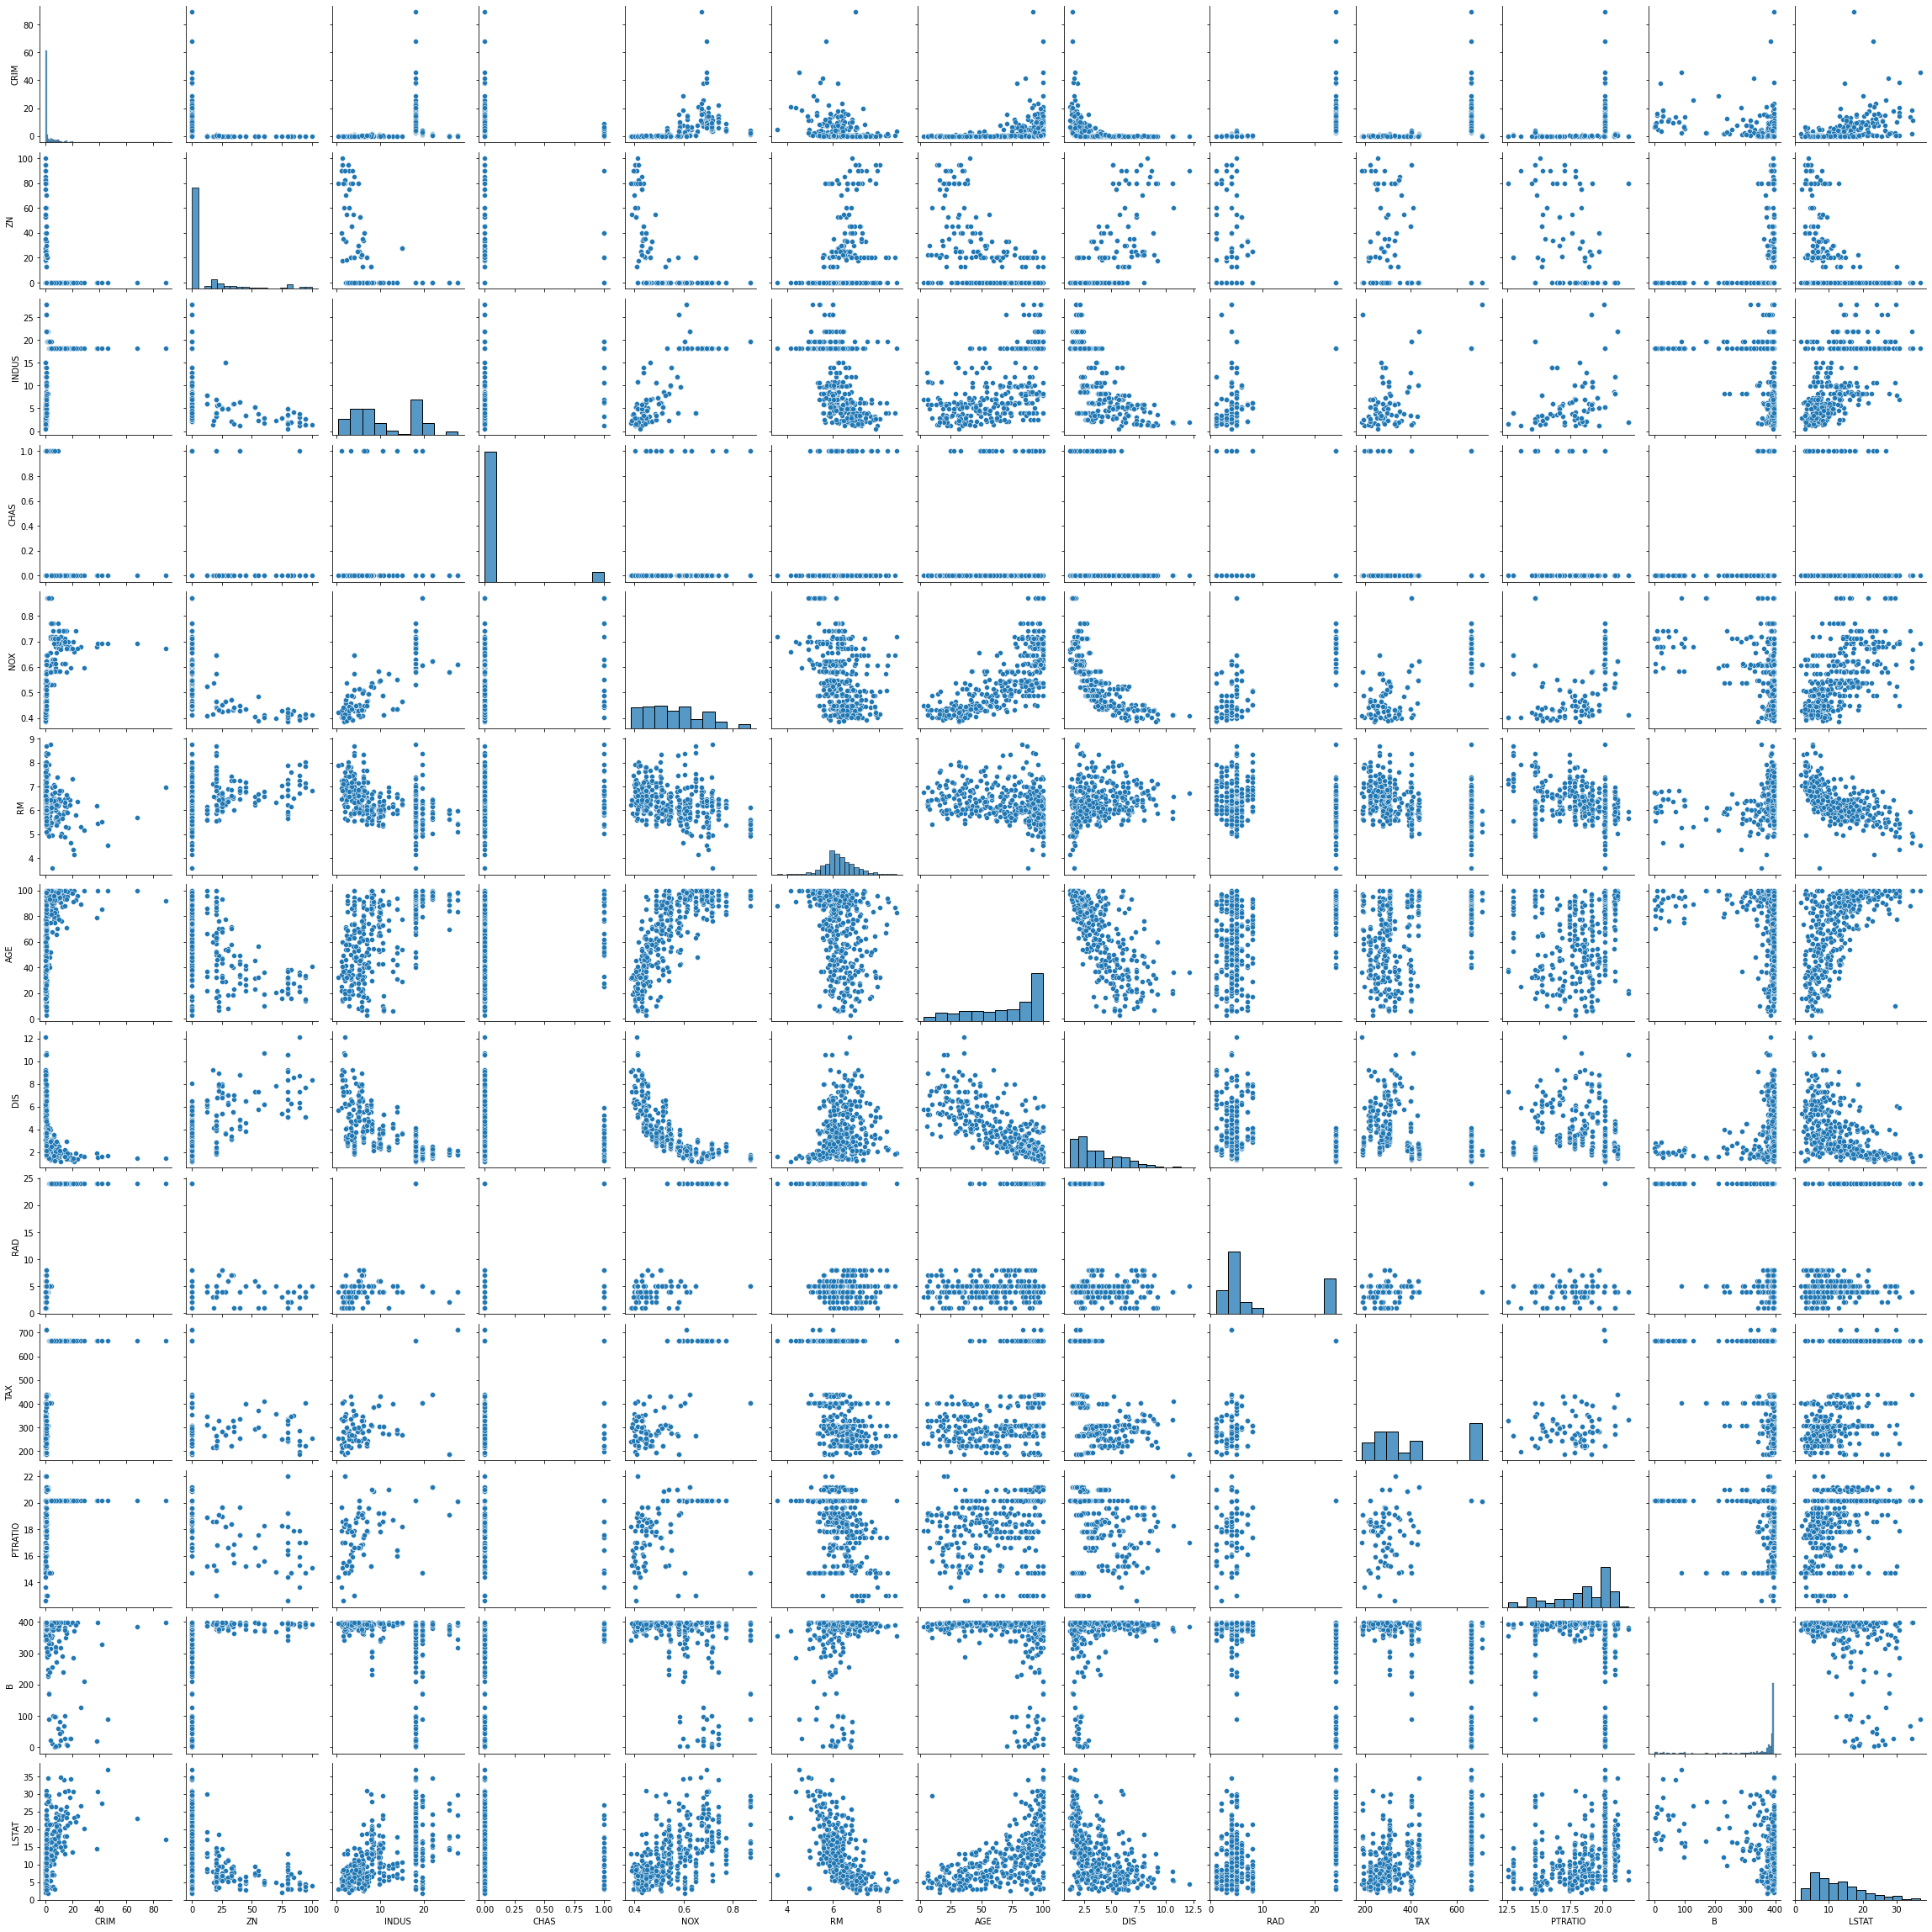

In [12]:
sns.pairplot(X_train)
plt.show()

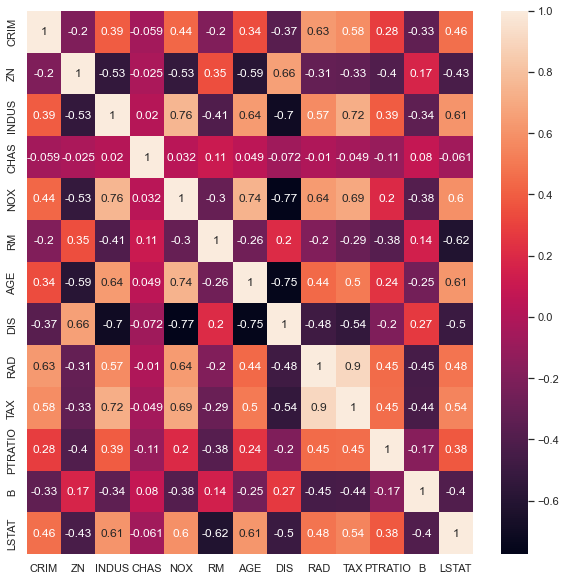

In [35]:
plt.figure(figsize=(10, 10))
matriz_corr = X_train.corr()
sns.heatmap(matriz_corr, annot=True)
plt.show()

In [14]:
X_test.shape

(102, 13)

- 102 columnas y 13 filas corresponden al 20% del DataSet

In [15]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 329 to 108
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    float64
 2   INDUS    102 non-null    float64
 3   CHAS     102 non-null    int64  
 4   NOX      102 non-null    float64
 5   RM       102 non-null    float64
 6   AGE      102 non-null    float64
 7   DIS      102 non-null    float64
 8   RAD      102 non-null    int64  
 9   TAX      102 non-null    float64
 10  PTRATIO  102 non-null    float64
 11  B        102 non-null    float64
 12  LSTAT    102 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 11.2 KB


In [16]:
X_test.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  102.000000  102.000000  102.000000  102.000000  102.000000  102.000000   
mean     4.513411    9.656863   11.189608    0.068627    0.549979    6.216657   
std     10.230340   22.061680    6.339877    0.254068    0.118982    0.732735   
min      0.013600    0.000000    0.740000    0.000000    0.392000    3.863000   
25%      0.094115    0.000000    5.885000    0.000000    0.448000    5.881000   
50%      0.249035    0.000000    9.900000    0.000000    0.520000    6.157000   
75%      5.178705    0.000000   18.100000    0.000000    0.605000    6.469000   
max     73.534100   85.000000   21.890000    1.000000    0.871000    8.725000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  102.000000  102.000000  102.000000  102.000000  102.000000  102.000000   
mean    66.783333    3.893275   10.127451  429.598039   18.428431  348.311176   
std     28.382215    2.210300    8.907302  158.010105    2.052498  101.085667   
min      8.400000    1.129600    1.000000  224.000000   12.600000    2.600000   
25%     39.625000    2.135475    4.000000  304.000000   16.900000  366.755000   
50%     72.550000    3.347500    5.000000  384.000000   18.700000  390.680000   
75%     95.200000    5.186050   24.000000  666.000000   20.200000  396.900000   
max    100.000000   10.710300   24.000000  666.000000   21.200000  396.900000   

            LSTAT  
count  102.000000  
mean    12.442647  
std      6.507064  
min      1.920000  
25%      8.027500  
50%     11.550000  
75%     15.705000  
max     37.970000

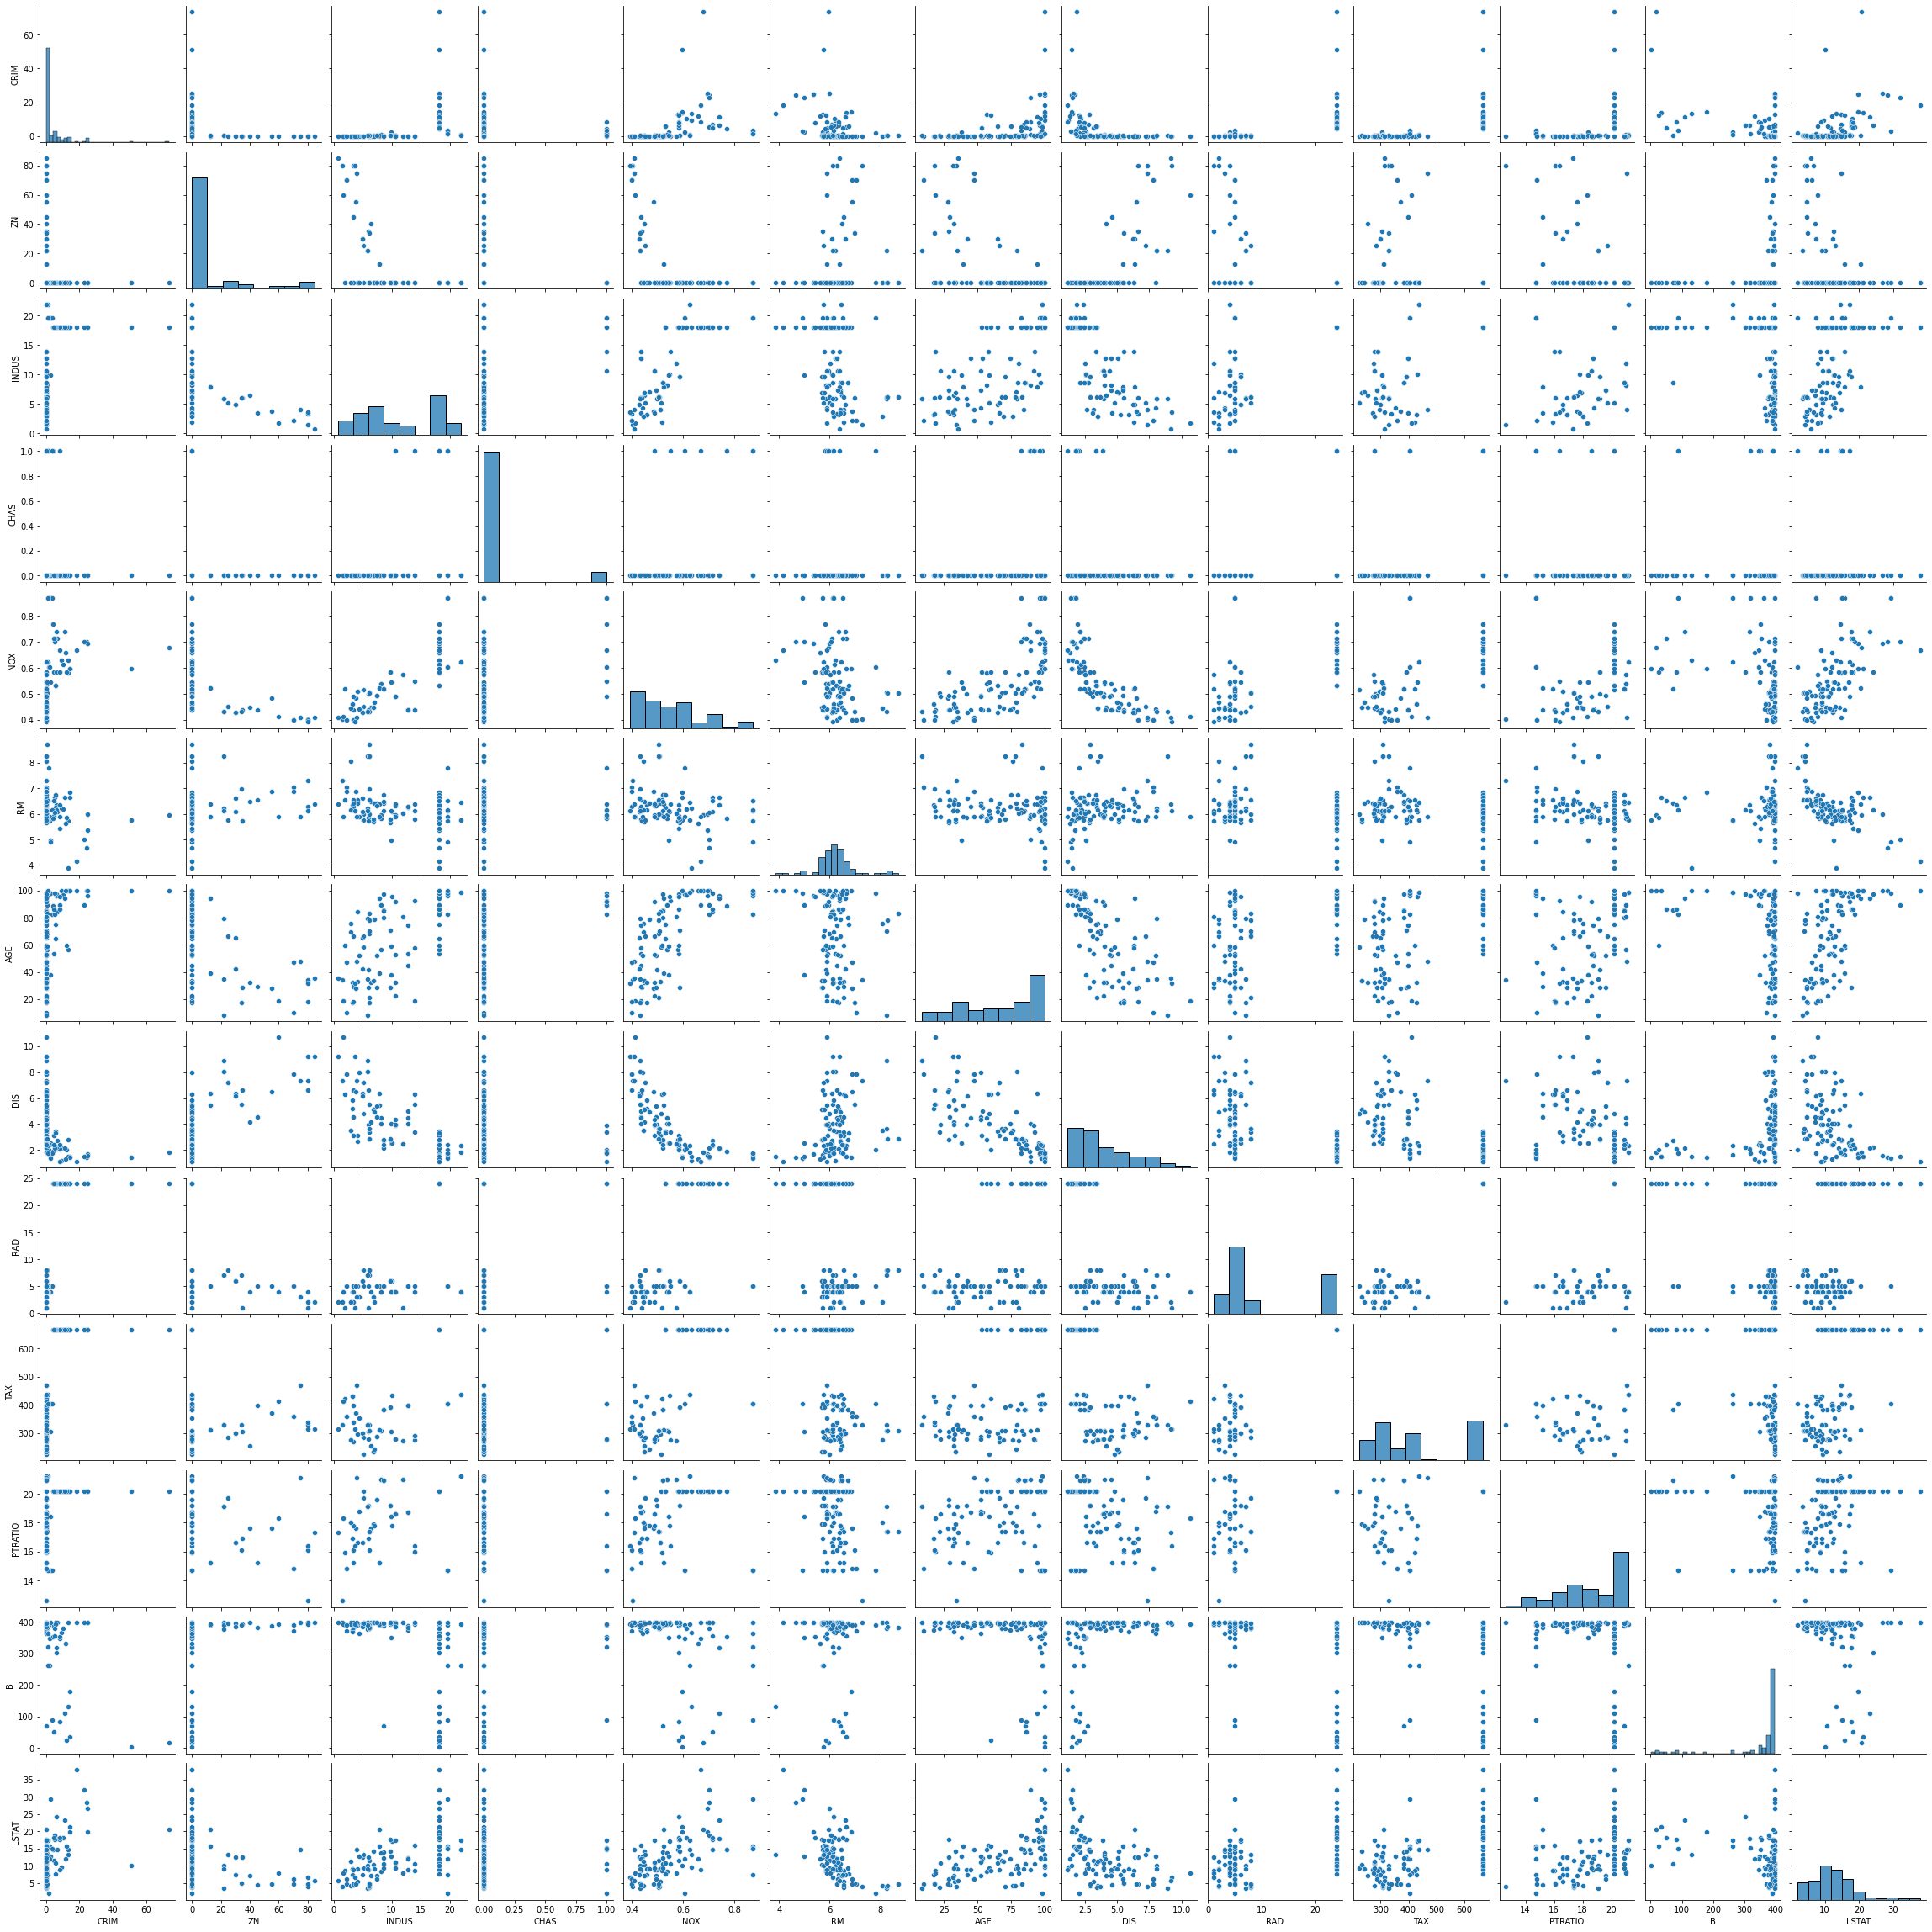

In [17]:
sns.pairplot(X_test)
plt.show()

- Se puede observar ( un dato algo obvio) que el gráfico pairplot del "X_train" tiene mayor cantidad de datos (puntos) que el gráfico pairplot del "X_test".

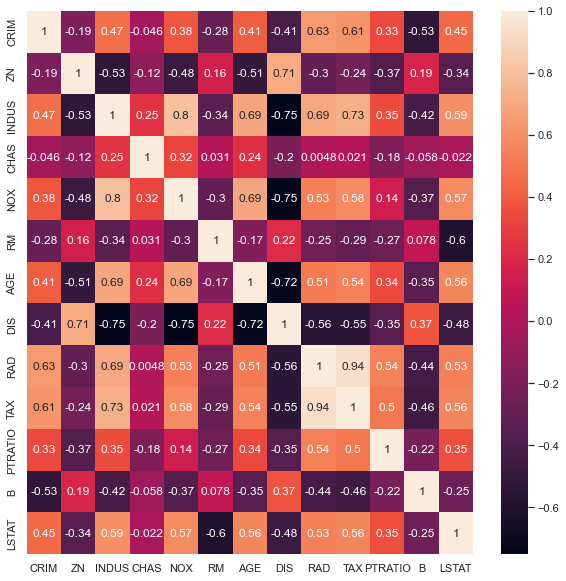

In [34]:
plt.figure(figsize=(10, 10))
matriz_corr = X_test.corr()
sns.heatmap(matriz_corr, annot=True)
plt.show()

- Se puede observar que las graficas tanto en Train como en Test son similares.

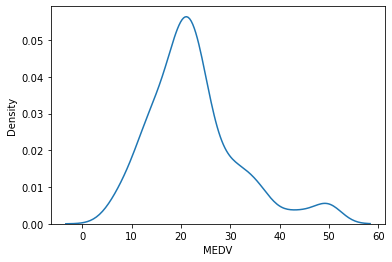

In [19]:
sns.kdeplot(y_train['MEDV'])
plt.show()

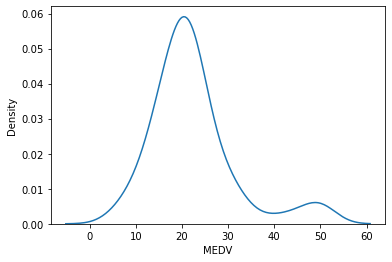

In [20]:
sns.kdeplot(y_test['MEDV'])
plt.show()

<Figure size 432x288 with 0 Axes>

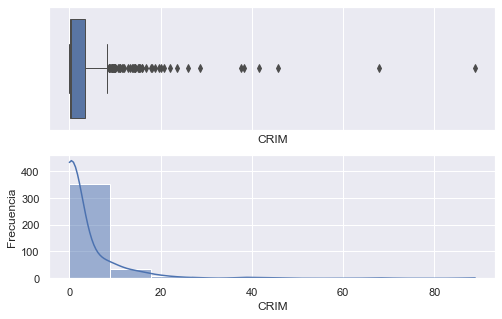

<Figure size 576x360 with 0 Axes>

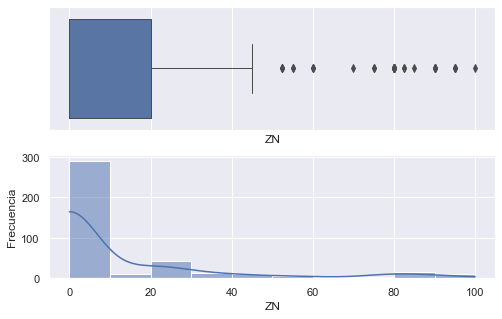

<Figure size 576x360 with 0 Axes>

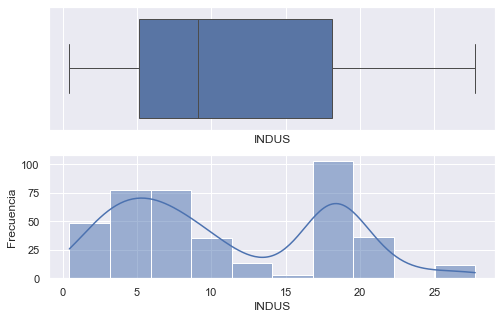

<Figure size 576x360 with 0 Axes>

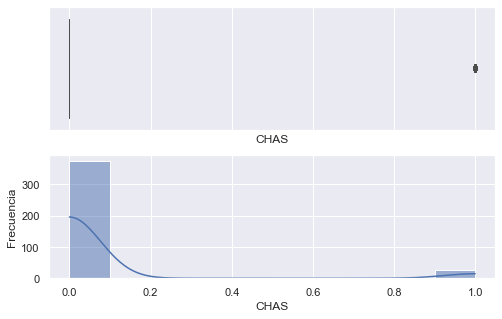

<Figure size 576x360 with 0 Axes>

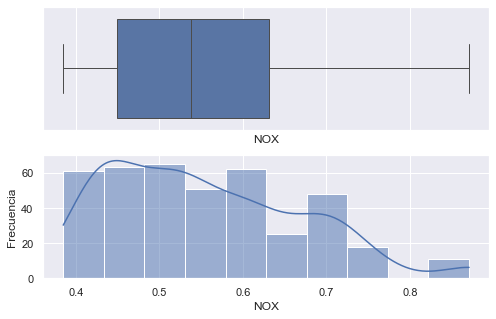

<Figure size 576x360 with 0 Axes>

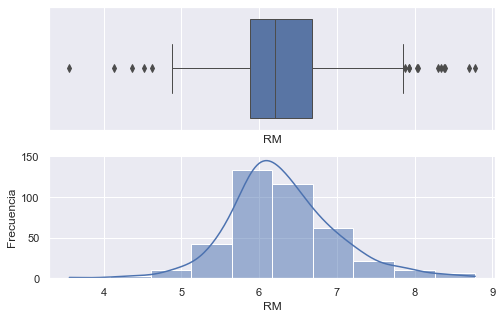

<Figure size 576x360 with 0 Axes>

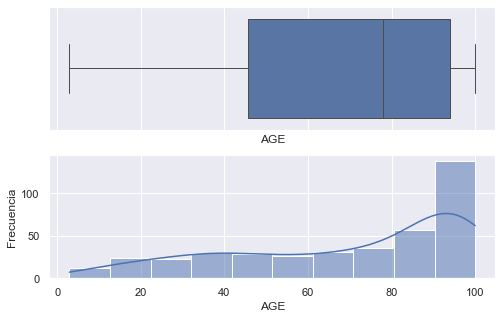

<Figure size 576x360 with 0 Axes>

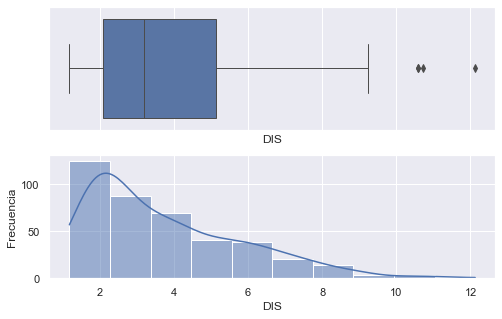

<Figure size 576x360 with 0 Axes>

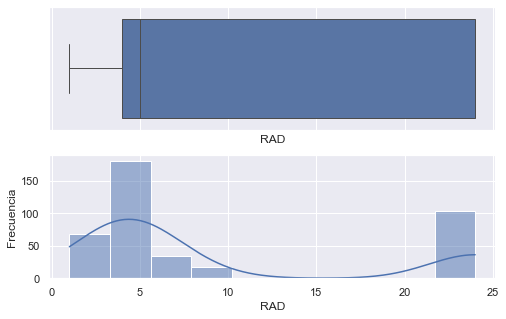

<Figure size 576x360 with 0 Axes>

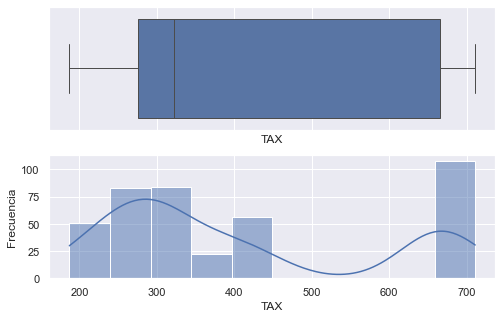

<Figure size 576x360 with 0 Axes>

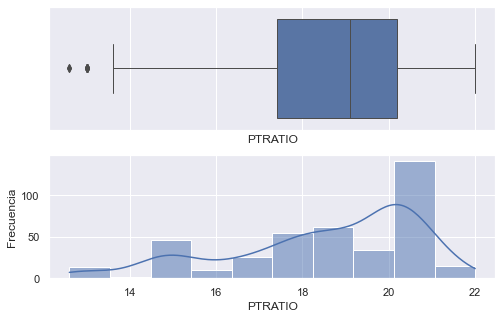

<Figure size 576x360 with 0 Axes>

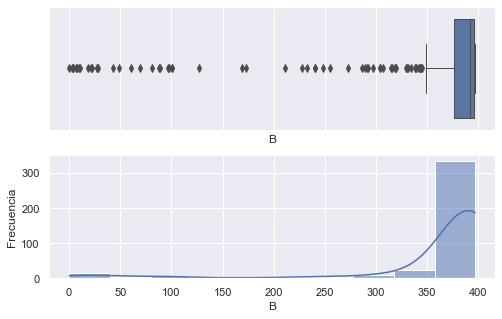

<Figure size 576x360 with 0 Axes>

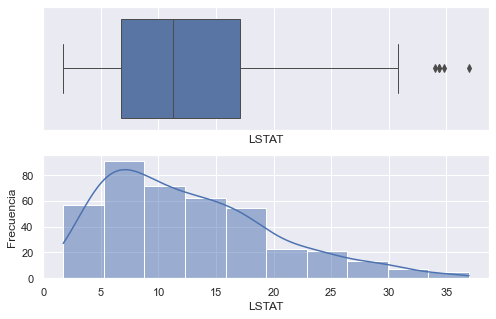

In [21]:
for i in X_train.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frecuencia')
    sns.boxplot(X_train[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(X_train[i], ax=ax_hist , bins = 10,kde=True)

<Figure size 576x360 with 0 Axes>

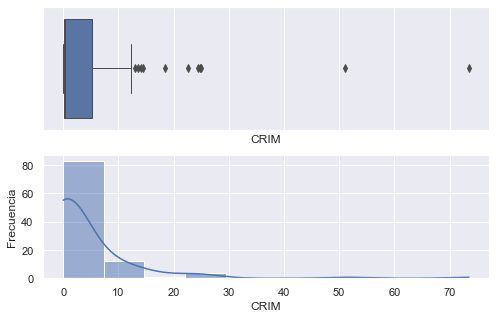

<Figure size 576x360 with 0 Axes>

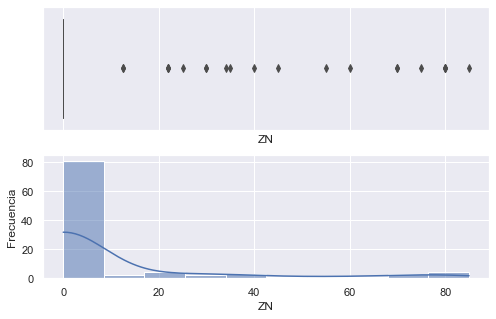

<Figure size 576x360 with 0 Axes>

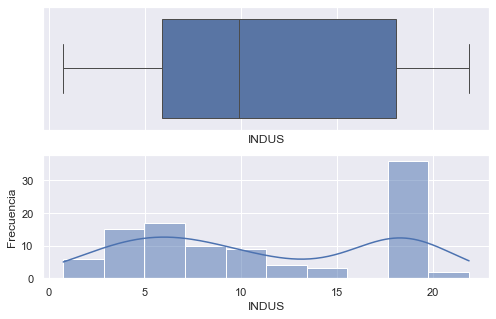

<Figure size 576x360 with 0 Axes>

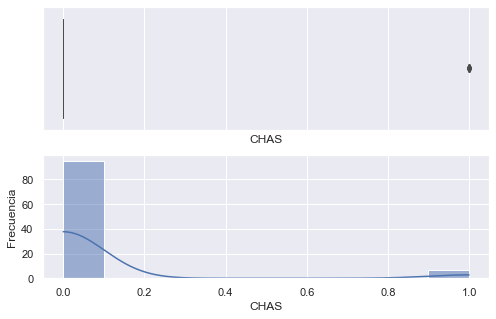

<Figure size 576x360 with 0 Axes>

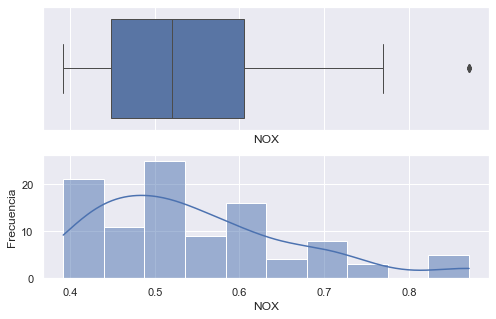

<Figure size 576x360 with 0 Axes>

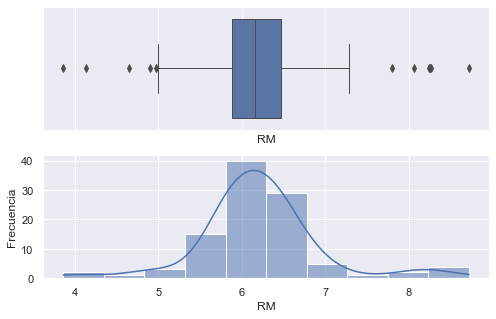

<Figure size 576x360 with 0 Axes>

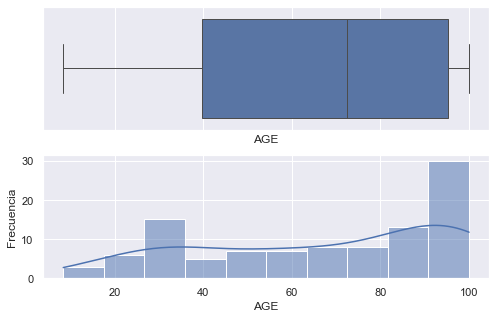

<Figure size 576x360 with 0 Axes>

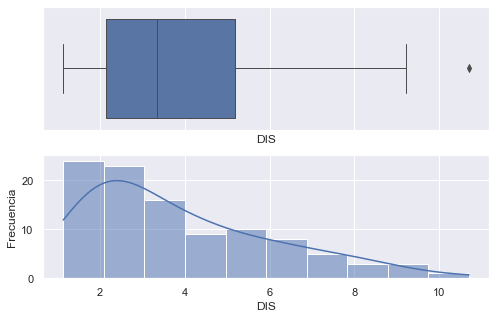

<Figure size 576x360 with 0 Axes>

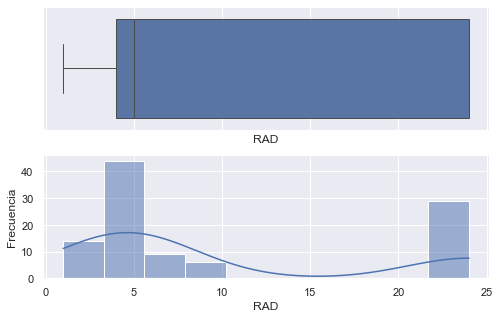

<Figure size 576x360 with 0 Axes>

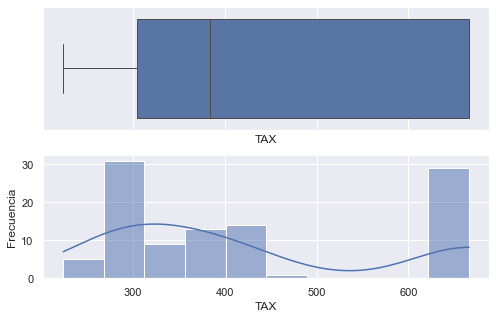

<Figure size 576x360 with 0 Axes>

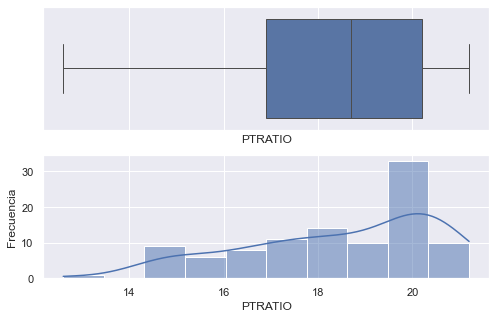

<Figure size 576x360 with 0 Axes>

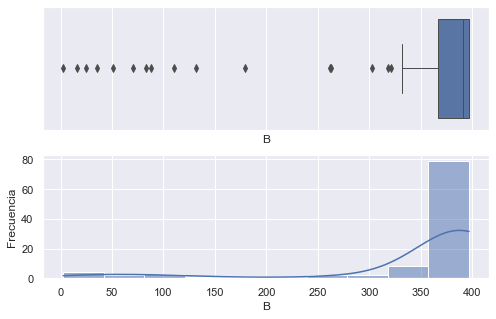

<Figure size 576x360 with 0 Axes>

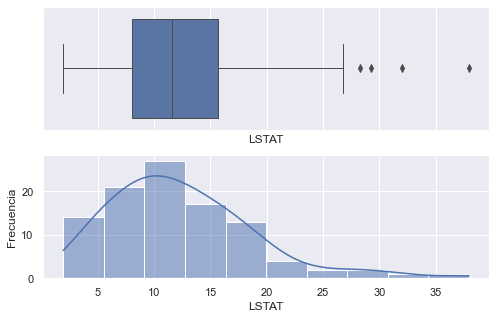

In [22]:
for i in X_test.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frecuencia')
    sns.boxplot(X_test[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(X_test[i], ax=ax_hist , bins = 10,kde=True)

## Exercici 2

Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

In [23]:
from scipy import stats

print('Hipotesis nula (Ho): La muestra tiene una distribución normal (Probablemente Gaussiana).')
print('Hipotesis alternativa (H1): La muestra no tiene una distribución normal (Probablemente no Gaussiana).\n')

for i in X_train.columns:
    shapiro_test = stats.shapiro(X_train[i])
    print('La variable', i, 'tiene un p-value= ', shapiro_test.pvalue)
    if shapiro_test.pvalue>0.05:
        print('Se acepta la hipotesis nula, la muestra tiene una distribución normal (Probablemente Gaussiana).\n')
    else:
        print('Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).\n')

Hipotesis nula (Ho): La muestra tiene una distribución normal (Probablemente Gaussiana).
Hipotesis alternativa (H1): La muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable CRIM tiene un p-value=  1.7688021655257976e-33
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable ZN tiene un p-value=  2.078160412479741e-30
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable INDUS tiene un p-value=  1.1659603336533313e-15
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable CHAS tiene un p-value=  7.311244917983412e-37
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable NOX tiene un p-value=  1.2737411819729871e-11
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gauss

In [24]:
print('Hipotesis nula (Ho): La muestra tiene una distribución normal (Probablemente Gaussiana).')
print('Hipotesis alternativa (H1): La muestra no tiene una distribución normal (Probablemente no Gaussiana).\n')

for i in X_test.columns:
    shapiro_test = stats.shapiro(X_test[i])
    print('La variable', i, 'tiene un p-value= ', shapiro_test.pvalue)
    if shapiro_test.pvalue>0.05:
        print('Se acepta la hipotesis nula, la muestra tiene una distribución normal (Probablemente Gaussiana).\n')
    else:
        print('Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).\n')

Hipotesis nula (Ho): La muestra tiene una distribución normal (Probablemente Gaussiana).
Hipotesis alternativa (H1): La muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable CRIM tiene un p-value=  2.6516626148508214e-17
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable ZN tiene un p-value=  5.2958309733519123e-17
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable INDUS tiene un p-value=  2.006331527582006e-07
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable CHAS tiene un p-value=  3.5316870456212186e-20
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable NOX tiene un p-value=  2.480220018696855e-06
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gauss

- Según la documentación, lo anterior debería hacerse previamente a separar el DataSet en Train y Test.
- La variable "CHAS" al ser un dummie ya está lista para un entrenamiento de Machine learning por lo que no se realizará ninguna transformación.
- Aquellas variables que tienen outliers ("CRIM", "ZN", "RM","DIS", "PTRATIO", "B", "LSTAT", "MEDV"), se hará RobustScaler.
- Aquellas variables que no tienen una distribución normal ("INDUS", "NOX", "AGE", "TAX"), se hará una normalización.

In [25]:
train_df = df.copy()
train_df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

In [26]:
#RobustScaler para las variables con outliers
robust_col = ['CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']
Robust_scaler = preprocessing.RobustScaler().fit(train_df[robust_col])
train_df[robust_col] = Robust_scaler.transform(train_df[robust_col])


train_df.head()

CRIM    ZN  INDUS  CHAS    NOX        RM   AGE       DIS  RAD    TAX  \
0 -0.069593  1.44   2.31     0  0.538  0.496612  65.2  0.285777    1  296.0   
1 -0.063755  0.00   7.07     0  0.469  0.287940  78.9  0.569789    2  242.0   
2 -0.063760  0.00   7.07     0  0.469  1.323171  61.1  0.569789    2  242.0   
3 -0.062347  0.00   2.18     0  0.458  1.069783  45.8  0.924391    3  222.0   
4 -0.052144  0.00   2.18     0  0.458  1.271680  54.2  0.924391    3  222.0   

    PTRATIO         B     LSTAT  MEDV  
0 -1.339286  0.261902 -0.637681  24.0  
1 -0.446429  0.261902 -0.221889  21.6  
2 -0.446429  0.066675 -0.732634  34.7  
3 -0.125000  0.153016 -0.841579  33.4  
4 -0.125000  0.261902 -0.602699  36.2

In [27]:
#Normalización para las variables que no tienen distribución normal
norm_col = ['INDUS', 'NOX', 'AGE', 'TAX']
norm_scaler = preprocessing.MinMaxScaler().fit(train_df[norm_col])
train_df[norm_col] = norm_scaler.transform(train_df[norm_col])

train_df.head()

CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0 -0.069593  1.44  0.067815     0  0.314815  0.496612  0.641607  0.285777   
1 -0.063755  0.00  0.242302     0  0.172840  0.287940  0.782698  0.569789   
2 -0.063760  0.00  0.242302     0  0.172840  1.323171  0.599382  0.569789   
3 -0.062347  0.00  0.063050     0  0.150206  1.069783  0.441813  0.924391   
4 -0.052144  0.00  0.063050     0  0.150206  1.271680  0.528321  0.924391   

   RAD       TAX   PTRATIO         B     LSTAT  MEDV  
0    1  0.208015 -1.339286  0.261902 -0.637681  24.0  
1    2  0.104962 -0.446429  0.261902 -0.221889  21.6  
2    2  0.104962 -0.446429  0.066675 -0.732634  34.7  
3    3  0.066794 -0.125000  0.153016 -0.841579  33.4  
4    3  0.066794 -0.125000  0.261902 -0.602699  36.2

## Exercici 3

Resumeix les noves columnes generades de manera estadística i gràfica

In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [29]:
train_df.describe()

CRIM          ZN       INDUS        CHAS         NOX  \
count  5.060000e+02  506.000000  506.000000  506.000000  506.000000   
mean   9.337910e-01    0.909091    0.391378    0.069170    0.349167   
std    2.392616e+00    1.865796    0.251479    0.253994    0.238431   
min   -6.959315e-02    0.000000    0.000000    0.000000    0.000000   
25%   -4.852940e-02    0.000000    0.173387    0.000000    0.131687   
50%   -7.697835e-18    0.000000    0.338343    0.000000    0.314815   
75%    9.514706e-01    1.000000    0.646628    0.000000    0.491770   
max    2.467838e+01    8.000000    1.000000    1.000000    1.000000   

               RM         AGE           DIS         RAD         TAX  \
count  506.000000  506.000000  5.060000e+02  506.000000  506.000000   
mean     0.103163    0.676364  1.902672e-01    9.549407    0.422208   
std      0.952056    0.289896  6.818457e-01    8.707259    0.321636   
min     -3.587398    0.000000 -6.728244e-01    1.000000    0.000000   
25%     -0.437669    0.433831 -3.585445e-01    4.000000    0.175573   
50%      0.000000    0.768280  7.199102e-17    5.000000    0.272901   
75%      0.562331    0.938980  6.414555e-01   24.000000    0.914122   
max      3.484417    1.000000  2.888060e+00   24.000000    1.000000   

          PTRATIO           B         LSTAT        MEDV  
count  506.000000  506.000000  5.060000e+02  506.000000  
mean    -0.212309   -1.667632  1.292417e-01   22.532806  
std      0.773195    4.379176  7.137493e-01    9.197104  
min     -2.303571  -18.761003 -9.625187e-01    5.000000  
25%     -0.589286   -0.770476 -4.407796e-01   17.025000  
50%      0.000000    0.000000  8.847090e-17   21.200000  
75%      0.410714    0.229524  5.592204e-01   25.000000  
max      1.053571    0.261902  2.659670e+00   50.000000

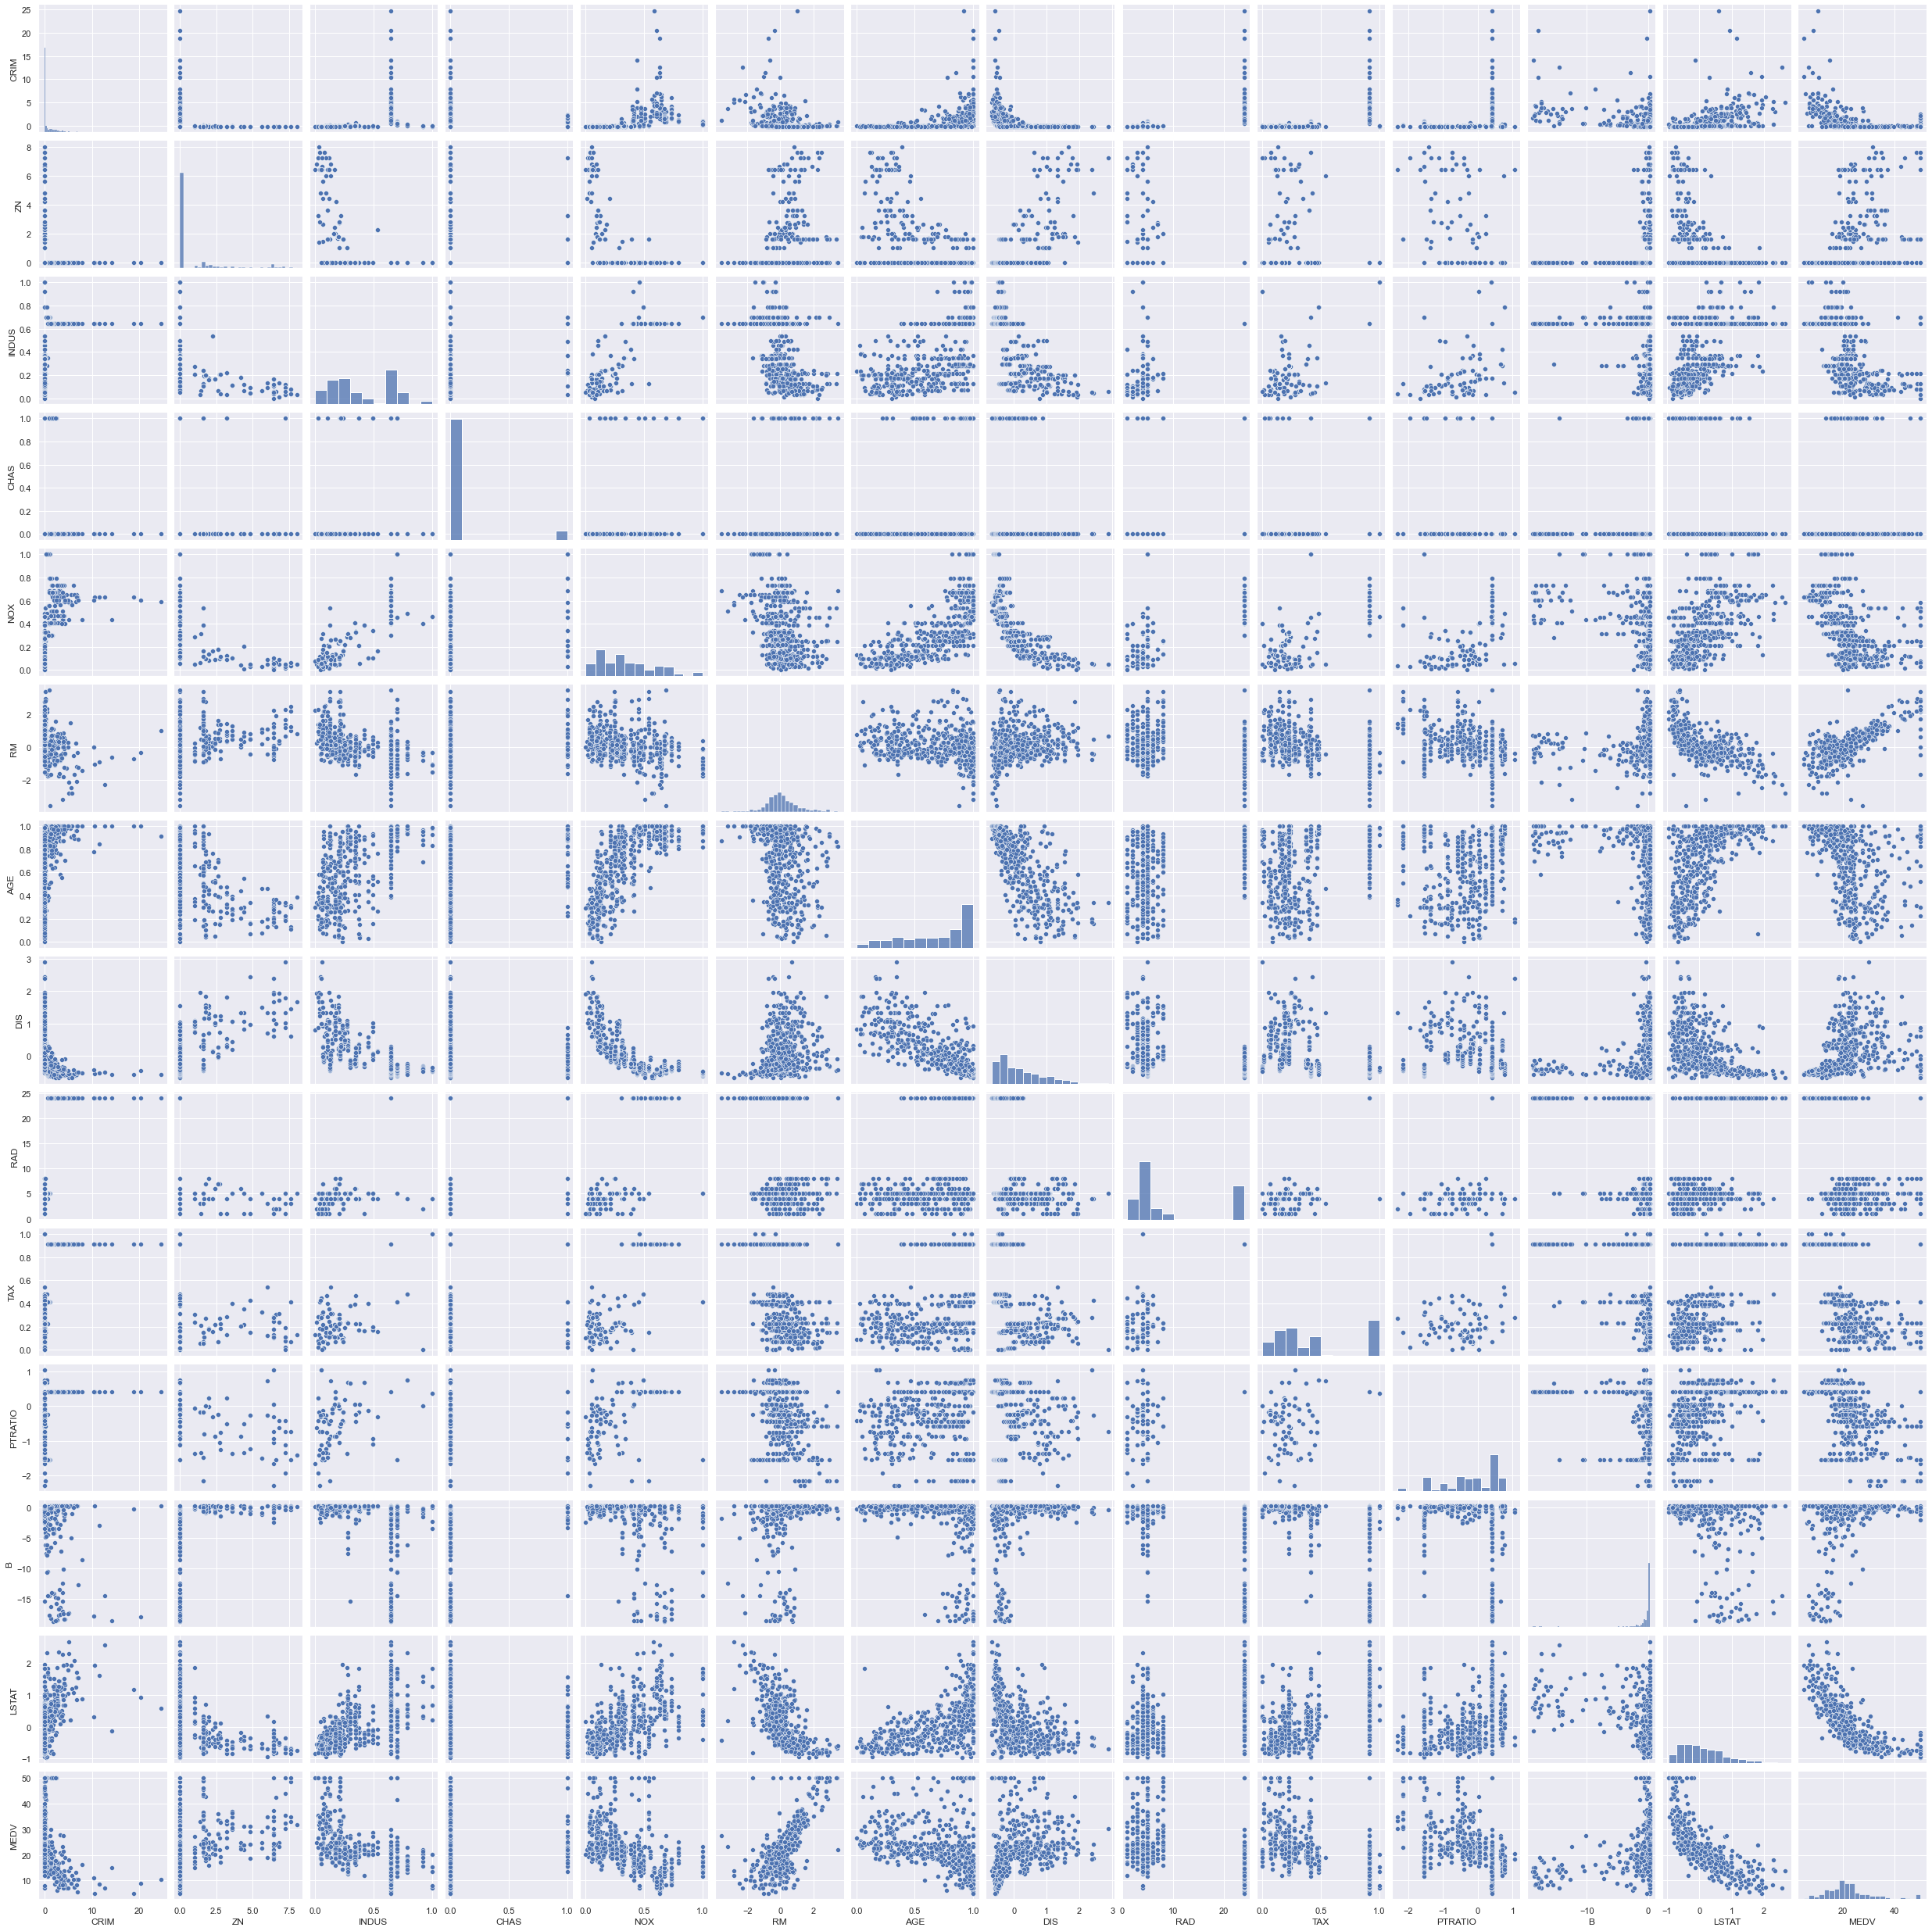

In [30]:
sns.pairplot(train_df)
plt.show()

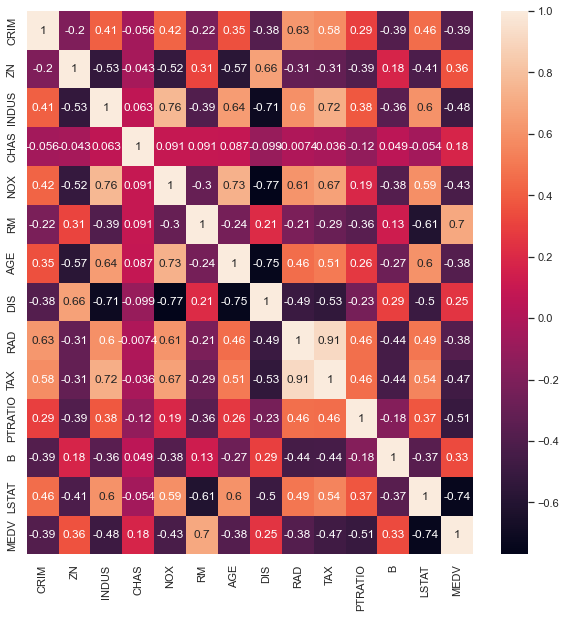

In [33]:
plt.figure(figsize=(10, 10))
matriz_corr = train_df.corr()
sns.heatmap(matriz_corr, annot=True)
plt.show()

<Figure size 576x360 with 0 Axes>

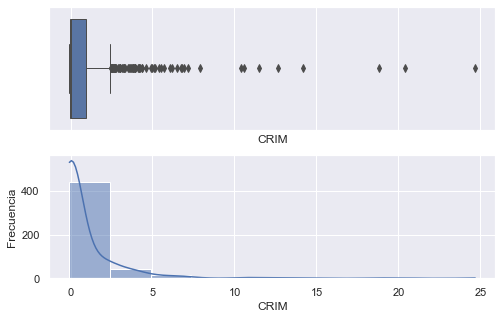

<Figure size 576x360 with 0 Axes>

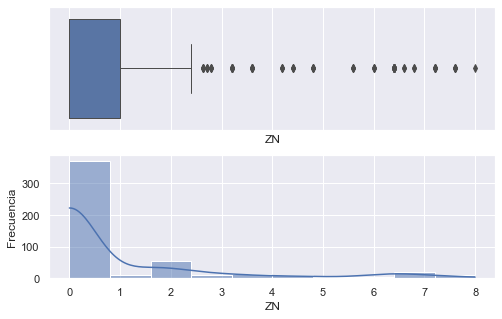

<Figure size 576x360 with 0 Axes>

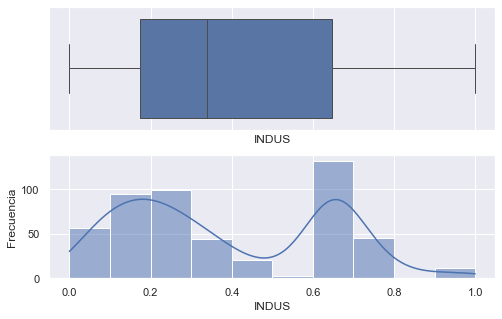

<Figure size 576x360 with 0 Axes>

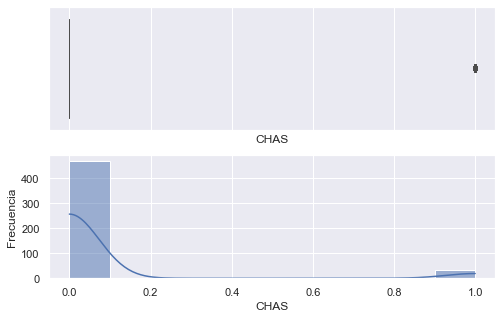

<Figure size 576x360 with 0 Axes>

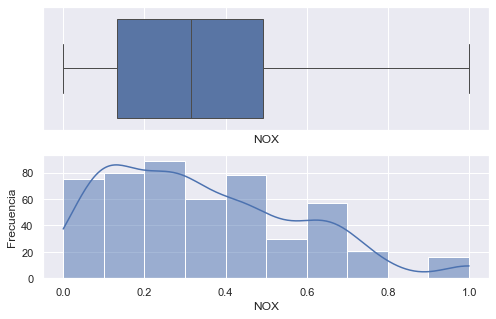

<Figure size 576x360 with 0 Axes>

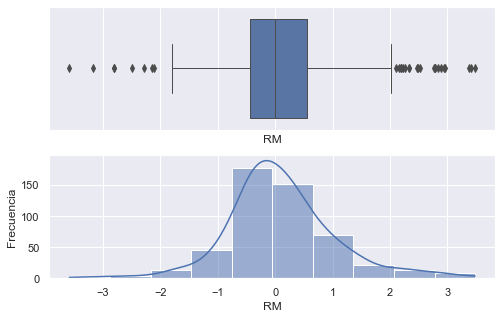

<Figure size 576x360 with 0 Axes>

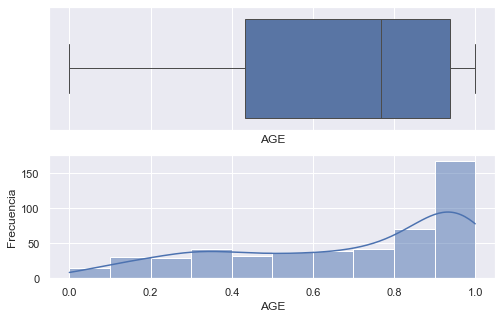

<Figure size 576x360 with 0 Axes>

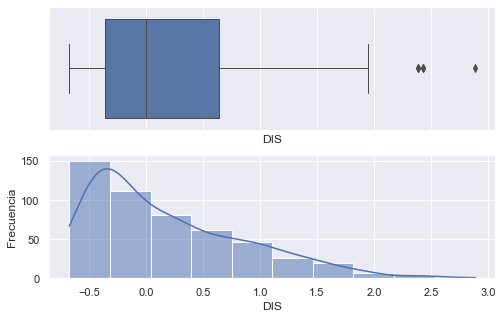

<Figure size 576x360 with 0 Axes>

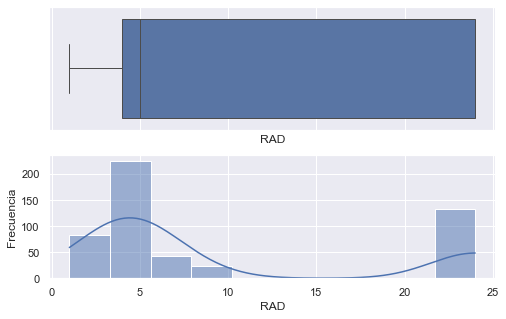

<Figure size 576x360 with 0 Axes>

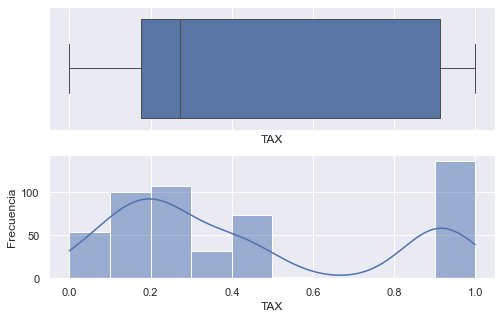

<Figure size 576x360 with 0 Axes>

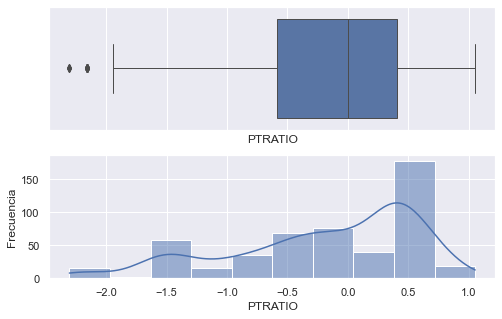

<Figure size 576x360 with 0 Axes>

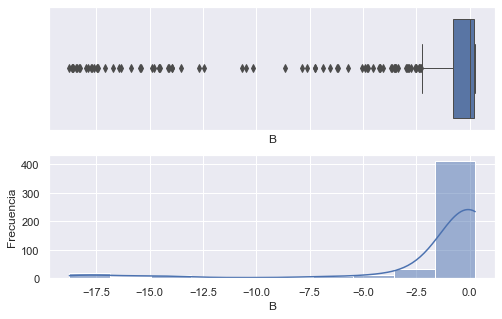

<Figure size 576x360 with 0 Axes>

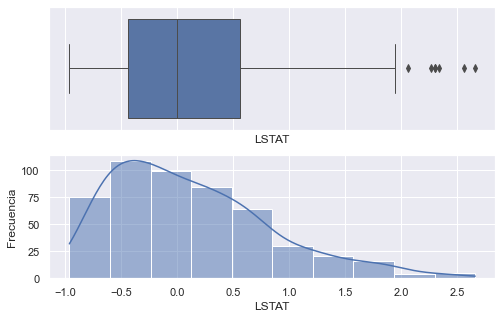

<Figure size 576x360 with 0 Axes>

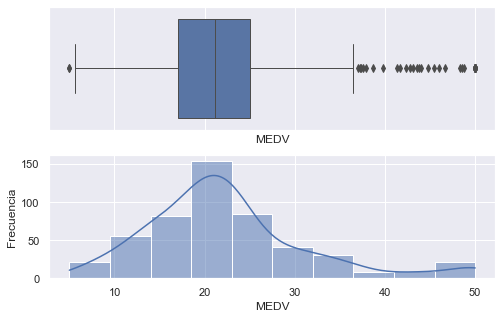

In [32]:
for i in train_df.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={'figure.figsize':(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frecuencia')
    sns.boxplot(train_df[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(train_df[i], ax=ax_hist , bins = 10,kde=True)